In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as  plt
import seaborn as sns

In [25]:
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [10]:
df.shape

(1000, 3)

In [11]:
#df.sample
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


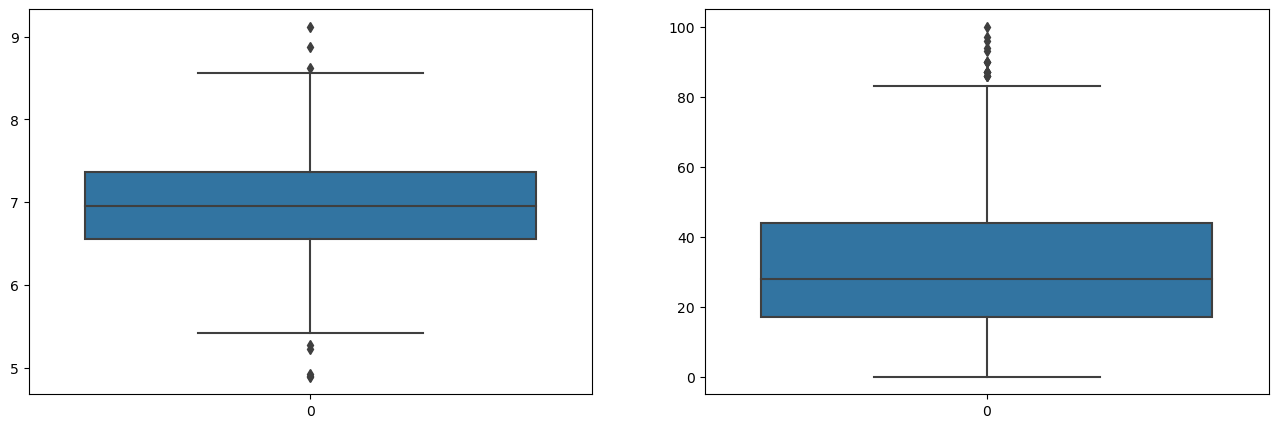

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])

plt.subplot(1,2,2,)
sns.boxplot(df['placement_exam_marks'])

plt.show()

In [271]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])

plt.subplot(1,2,2,)
sns.distplot.(df['placement_exam_marks'])
plt.show()


SyntaxError: invalid syntax (139299941.py, line 6)

In [25]:
df['cgpa'].skew()

-0.014529938929314918

In [26]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [13]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [17]:
#finding the boundary values
ub = df['cgpa'].mean() + 3*df['cgpa'].std()
lb = df['cgpa'].mean() - 3*df['cgpa'].std()
print("Highest allowed",ub)
print("lowest allowed",lb)

Highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [22]:
#finding the outliners
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [24]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [38]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [39]:
df['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [40]:
df['cgpa'].std()

0.6158978751323894

In [41]:
df['cgpa'].mean()

6.96124

In [43]:
(7.19-6.96)/0.61

0.37704918032786955

In [44]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [45]:
df[df['cgpa_zscore'] > -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [62]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,8.808934,44.0,1,-3.314251
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,8.808934,34.0,0,-3.362960
999,8.808934,10.0,1,-3.346724


# Trimming

In [63]:
new_df = df[(df['cgpa_zscore'] > 3) & (df['cgpa_zscore'] < -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore


# Capping

In [53]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() + 3*df['cgpa'].std()

In [55]:
lower_limit

8.808933625397168

In [54]:
upper_limit

8.808933625397168

In [56]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [57]:
df.shape

(1000, 4)

In [58]:
df['cgpa'].describe()

count    1.000000e+03
mean     8.808934e+00
std      5.864911e-14
min      8.808934e+00
25%      8.808934e+00
50%      8.808934e+00
75%      8.808934e+00
max      8.808934e+00
Name: cgpa, dtype: float64

# Z square

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [28]:
df.shape

(1000, 3)

In [214]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


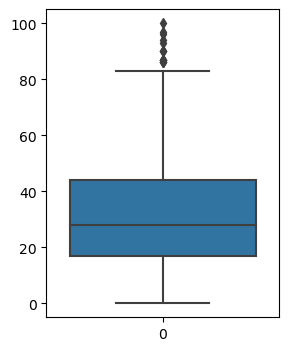

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,4))
sns.boxplot(df['placement_exam_marks'])
plt.show()


C:\Users\bldea\AppData\Local\Temp\ipykernel_1056\947313667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


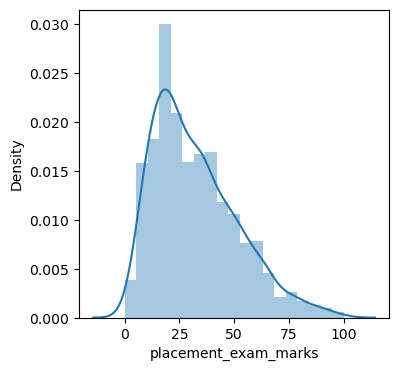

In [224]:
plt.figure(figsize=(4,4))
sns.distplot(df['placement_exam_marks'])
plt.show()

In [33]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [34]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [36]:
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


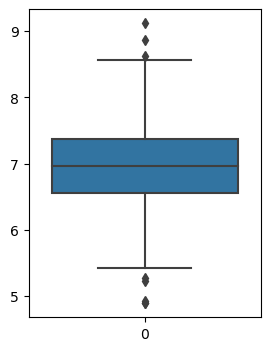

In [37]:
plt.figure(figsize=(3,4))
sns.boxplot(df['cgpa'])
plt.show()

In [245]:
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [246]:
df.shape

(1000, 3)

In [247]:
df.head

<bound method NDFrame.head of      cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]>

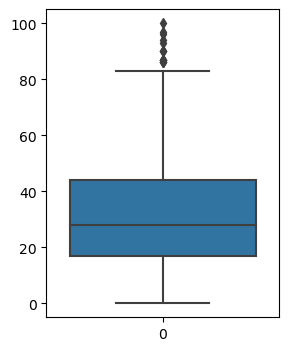

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,4)) 
sns.boxplot(df['placement_exam_marks'])
plt.show()

C:\Users\bldea\AppData\Local\Temp\ipykernel_1056\1947411302.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


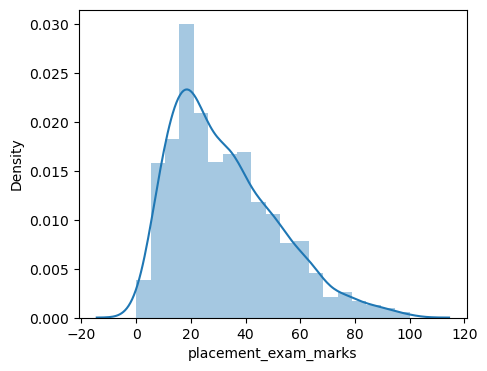

In [249]:
plt.figure(figsize=(5,4))
sns.distplot(df['placement_exam_marks'])
plt.show()

In [250]:
df['placement_exam_marks_zscore'] = (df['placement_exam_marks'] - df['placement_exam_marks'].mean())/df['placement_exam_marks'].std()

In [251]:
df[(df['placement_exam_marks_zscore'] > 3) | (df['placement_exam_marks_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,placement_exam_marks_zscore
9,7.75,94.0,1,3.229082
134,6.33,93.0,0,3.176811
162,7.80,90.0,0,3.019996
324,6.64,90.0,0,3.019996
630,6.56,96.0,1,3.333626
730,6.14,90.0,1,3.019996
846,6.99,97.0,0,3.385897
917,5.95,100.0,0,3.542712


In [252]:
new_df=df[(df['placement_exam_marks_zscore'] < 3) & (df['placement_exam_marks_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,placement_exam_marks_zscore
0,7.19,26.0,1,-0.325391
1,7.46,38.0,1,0.301869
2,7.54,40.0,1,0.406412
3,6.42,8.0,1,-1.266281
4,7.23,17.0,0,-0.795836
...,...,...,...,...
995,8.87,44.0,1,0.615499
996,9.12,65.0,1,1.713204
997,4.89,34.0,0,0.092782
998,8.62,46.0,1,0.720042


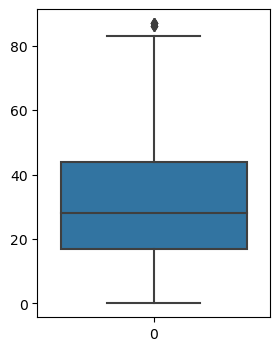

In [253]:
plt.figure(figsize=(3,4)) 
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

In [254]:
df = pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


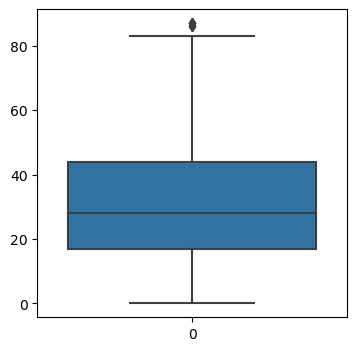

In [255]:
plt.figure(figsize=(4,4)) 
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

C:\Users\bldea\AppData\Local\Temp\ipykernel_1056\1115992896.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


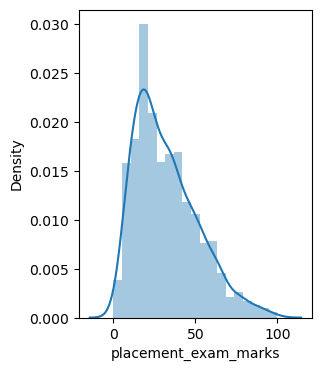

In [256]:
plt.figure(figsize=(3,4))
sns.distplot(df['placement_exam_marks'])
plt.show()

In [257]:
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
iqr=Q3-Q1

In [258]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr

In [259]:
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [261]:
new_df=df[(df['placement_exam_marks'] <= upper_limit) & (df['placement_exam_marks'] >= lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


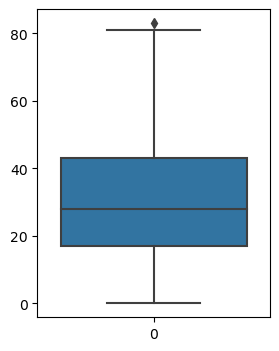

In [262]:
plt.figure(figsize=(3,4)) 
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

In [263]:
import numpy as pd
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [264]:
df['placement_exam_marks'][630]

84.5

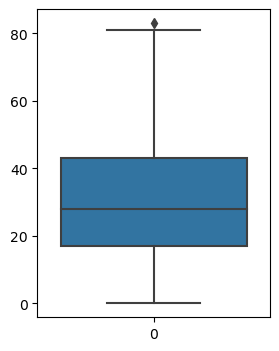

In [265]:
plt.figure(figsize=(3,4)) 
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

In [267]:
new_df1=df[(df['placement_exam_marks'] <= upper_limit) & (df['placement_exam_marks'] >= lower_limit)]
new_df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


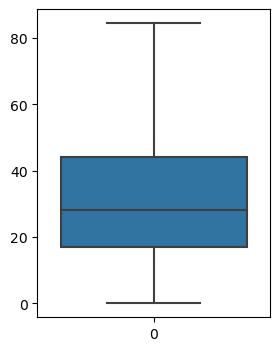

In [268]:
plt.figure(figsize=(3,4)) 
sns.boxplot(new_df1['placement_exam_marks'])
plt.show()

In [269]:
upper_limit

84.5

In [270]:
lower_limit

-23.5

In [177]:
df['placement_exam_marks'].unique()

array([26. , 38. , 40. ,  8. , 17. , 23. , 11. , 39. , 84.5, 16. ,  7. ,
       43. , 21. , 19. , 22. , 27. , 29. , 47. , 33. , 54. , 58. , 46. ,
       15. , 44. ,  9. , 12. , 20. , 71. , 63. , 55. , 10. , 42. , 28. ,
       18. , 36. , 24. , 32. , 31. , 52. , 30. ,  3. , 56. , 35. ,  6. ,
       76. , 77. , 37. ,  0. , 51. , 25. , 53. , 64. ,  5. , 41. , 49. ,
       34. , 81. , 50. , 59. , 48. , 45. , 14. , 57. , 60. , 78. , 13. ,
       62. , 65. ,  4. , 68. , 70. , 79. , 61. , 66. , 83. , 75. , 67. ,
       80. , 74. , 72. , 69. ,  2. ])